In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
sns.set_context("talk")

# Load data

In [2]:
data = pd.read_csv("titanic3.csv")
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


# Preprocess the data

In [3]:
# Encode sex as 0 and 1
labelencoder = LabelEncoder()

data["sex"] = labelencoder.fit_transform(data["sex"])
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


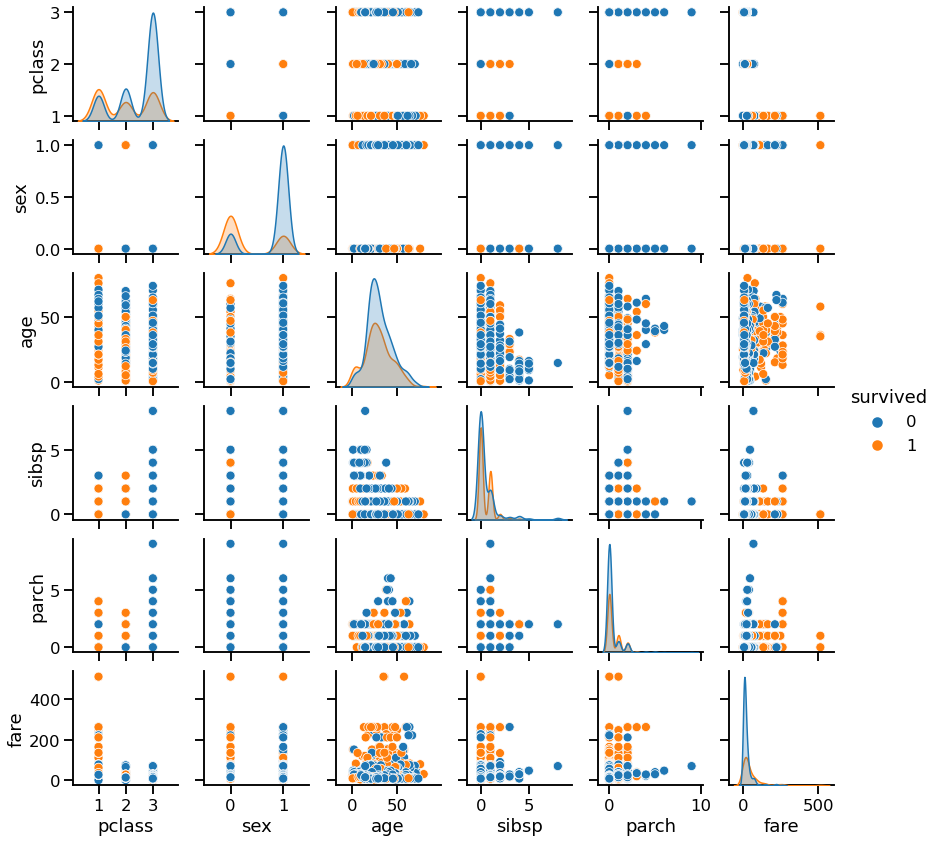

In [4]:
sns.pairplot(data=data, vars=["pclass", "sex", "age", "sibsp", "parch", "fare"], hue="survived", height=2)

In [5]:
# Transform sex to one hot encoding
onehotencoder = OneHotEncoder()

data[["female", "male"]] = onehotencoder.fit_transform(data[["sex"]]).toarray()
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,female,male
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1.0,0.0
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.0,1.0
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0.0,1.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0


In [6]:
# Add family feature as sum of siblings + parents (for children) or spouse + children (for adults)
data["family"] = data.sibsp + data.parch
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,female,male,family
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1.0,0.0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.0,1.0,3
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0.0,1.0,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0,3


<AxesSubplot:>

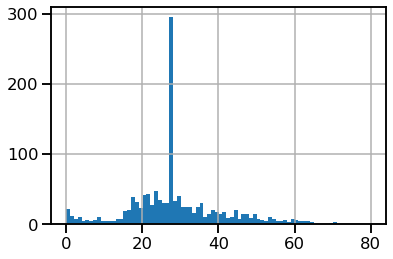

In [7]:
# Deal with missing values using imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

data["age"]  = imputer.fit_transform(data[["age"]])
data["fare"] = imputer.fit_transform(data[["fare"]])
data.age.hist(bins=int(data.age.max()))

<AxesSubplot:>

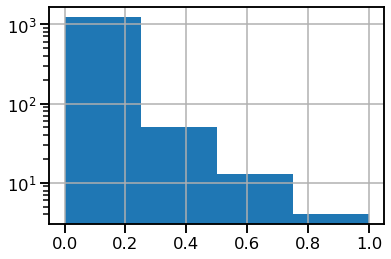

In [19]:
# Maybe fares can help distinguishing social class?
data.fare.hist(bins=4, log=True)

<AxesSubplot:>

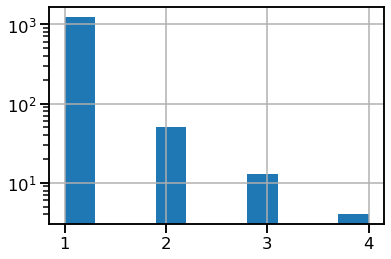

In [9]:
# Discretize the fares
binner = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy="uniform")

data["fare_class"] = binner.fit_transform(data[["fare"]]) + 1
data.fare_class.hist(log=True)

In [10]:
# Normalize "age" and "fare"
scaler = MinMaxScaler()

data["age"] = scaler.fit_transform(data[["age"]])
data["fare"] = scaler.fit_transform(data[["fare"]])
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,female,male,family,fare_class
0,1,1,"Allen, Miss. Elisabeth Walton",0,0.361142,0,0,24160,0.412503,B5,S,2,NaN,"St Louis, MO",1.0,0.0,0,2.0
1,1,1,"Allison, Master. Hudson Trevor",1,0.009395,1,2,113781,0.295806,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.0,1.0,3,2.0
2,1,0,"Allison, Miss. Helen Loraine",0,0.022924,1,2,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0,3,2.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,0.373669,1,2,113781,0.295806,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0.0,1.0,3,2.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,0.311036,1,2,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0,3,2.0


In [11]:
# Do not use the features "body" or "boat", why?
# However, we _can_ use other features except those listed here. How informative?
# Is "female"/"male" better than using "sex"?
data_ = data[["pclass", "sex", "age", "sibsp", "parch", "family", "fare", "fare_class", "survived"]].dropna()

X = data_[["pclass", "sex", "age", "sibsp", "parch", "family", "fare", "fare_class"]]
y = data_["survived"]

In [12]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((981, 8), (328, 8))

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

model = MLPClassifier(max_iter=1000)

params = {
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001, 0.01],
    "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 50)]
}

clf = GridSearchCV(estimator=model, param_grid=params, verbose=True)\
    .fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [14]:
clf.best_params_, clf.best_score_

({'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50)},
 0.8144773645498808)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[180  46]
 [ 27  75]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       226
           1       0.62      0.74      0.67       102

    accuracy                           0.78       328
   macro avg       0.74      0.77      0.75       328
weighted avg       0.79      0.78      0.78       328

